In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression

pd.set_option("display.max_columns", 100)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
import math
sns.set()

plt.style.use('ggplot')

In [47]:
data_2 = pd.read_csv('data/period_stats_18_2.csv')
data_3 = pd.read_csv('data/period_stats_18_3.csv')
data_4 = pd.read_csv('data/period_stats_18_4.csv')
data_5 = pd.read_csv('data/period_stats_18_5.csv')
data_6 = pd.read_csv('data/period_stats_18_6.csv')

In [24]:
data_net_2 = pd.read_csv('data/period_stats_18_2_net.csv')
data_net_3 = pd.read_csv('data/period_stats_18_3_net.csv')
data_net_4 = pd.read_csv('data/period_stats_18_4_net.csv')
data_net_5 = pd.read_csv('data/period_stats_18_5_net.csv')
data_net_6 = pd.read_csv('data/period_stats_18_6_net.csv')

In [4]:
team_colors = {'PHI': {(0,76,84), (165,172,175)},
 'BAL': {(26,25,95), (158,124,12)},
 'NYG': {(1,35,82), (163,13,45)},
 'NO': {(211,188,141), (16,24,31)},
 'NE': {(0,34,68), (198,12,48)},
 'MIN': {(79,38,131), (255, 198,47)},
 'MIA': {(0,142,151), (252,76,2)},
 'IND': {(0,44,95), (162,170,173)},
 'CLE': {(49,29,0), (255,60,0)},
 'LAC': {(0,128,198), (255,194,14)},
 'DEN': {(0,34,68), (251,79,20)},
 'CAR': {(0,133,202), (16,24,32)},
 'ARI': {(151,35,63), (0,0,0)},
 'GB': {(24,48,40), (255,184,28)},
 'DET': {(0,118,182), (176,183,188)},
 'OAK': {(0,0,0), (165,172,175)},
 'CIN': {(251,79,20), (0,0,0)},
 'ATL': {(167,25,48), (0,0,0)},
 'WAS': {(63,16,16), (255,182,18)},
 'TEN': {(12,35,64), (65,143,222)},
 'TB': {(213,10,10), (255,121,0)},
 'PIT': {(255,182,18), (0, 0,0)},
 'NYJ': {(18,87,64), (0,0,0)},
 'BUF': {(0,51,141), (198,12,48)},
 'SF': {(170,0,0), (173,153,93)},
 'LA': {(0,34,68), (134,109,75)},
 'JAX': {(0,103,120), (159,121,44)},
 'DAL': {(0,34,68), (134,147,151)},
 'CHI': {(11,22,42), (200,56,3)},
 'HOU': {(167,25,48), (3,32,47)},
 'KC': {(227,24,55), (255,184,28)},
 'SEA': {(0,34,68), (105,190,40)}}

In [6]:
home_primary_colors = list(list(list(team_colors[data_2.home_team[i]])[0]) for i in range(len(data_2.home_team)))
home_secondary_colors = list(list(list(team_colors[data_2.home_team[i]])[1]) for i in range(len(data_2.home_team)))


In [48]:
data_2 = data_2.drop(data_2.columns[0], axis = 1)

data_3 = data_3.drop(data_3.columns[0], axis = 1)

data_4 = data_4.drop(data_4.columns[0], axis = 1)

data_5 = data_5.drop(data_5.columns[0], axis = 1)

data_6 = data_6.drop(data_6.columns[0], axis = 1)


In [25]:
data_net_2 = data_net_2.drop(data_net_2.columns[0], axis = 1) 

data_net_3 = data_net_3.drop(data_net_3.columns[0], axis = 1) 

data_net_4 = data_net_4.drop(data_net_4.columns[0], axis = 1) 

data_net_5 = data_net_5.drop(data_net_5.columns[0], axis = 1)

data_net_6 = data_net_6.drop(data_net_6.columns[0], axis = 1) 

In [49]:
data_6.iloc[:, 9]

0      1
1      1
2      0
3      0
4      1
      ..
251    1
252    1
253    1
254    1
255    0
Name: h_win, Length: 256, dtype: int64

In [29]:
def plot_logit_features(df, n):
    fig, axs = plt.subplots(2,6, figsize=(30, 20))
    axs = axs.ravel()
    for i in range(10, len(df.columns)):
        y = df.iloc[:, 9] ## does the home team win?
        x = np.array(df.iloc[:, i]).reshape(-1, 1) ## The features. Were trying to predict if the home team wins using features.
        log_model = LogisticRegression()
        log_model.fit(x,y) ## To make this connection possible, we use a Logistic Model
        x_ = np.linspace(min(df.iloc[:, i]), max(df.iloc[:, i]), 250).reshape(-1, 1) ## need some x-values to graph the model
        sigmoid = log_model.predict_proba(x_)[:,1] ## we need some y-values for the graph. These are the predicted probabilities of winning a game
        axs[i - 9].scatter(df.iloc[:, i], y, c = np.array(home_primary_colors)/255.0, edgecolors=np.array(home_secondary_colors)/255.0, linewidth=5, s = 30**2, alpha=0.4) ## plot the predictor vs. the result of the actual game
        axs[i-9].plot(x_, sigmoid, 'g--', label='probability of a win') ## plot what are predictor would suggest the probability of winning is 
        axs[i-9].set_title(df.iloc[:, i].name) ## set the goddamn title 
    textstr = 'n = ' + str(n) + " (last " + str(n) + " games)"
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    fig.text(0.15, 0.8, textstr, transform=axs[i-9].transAxes, fontsize=40,
    verticalalignment='top', bbox=props)      

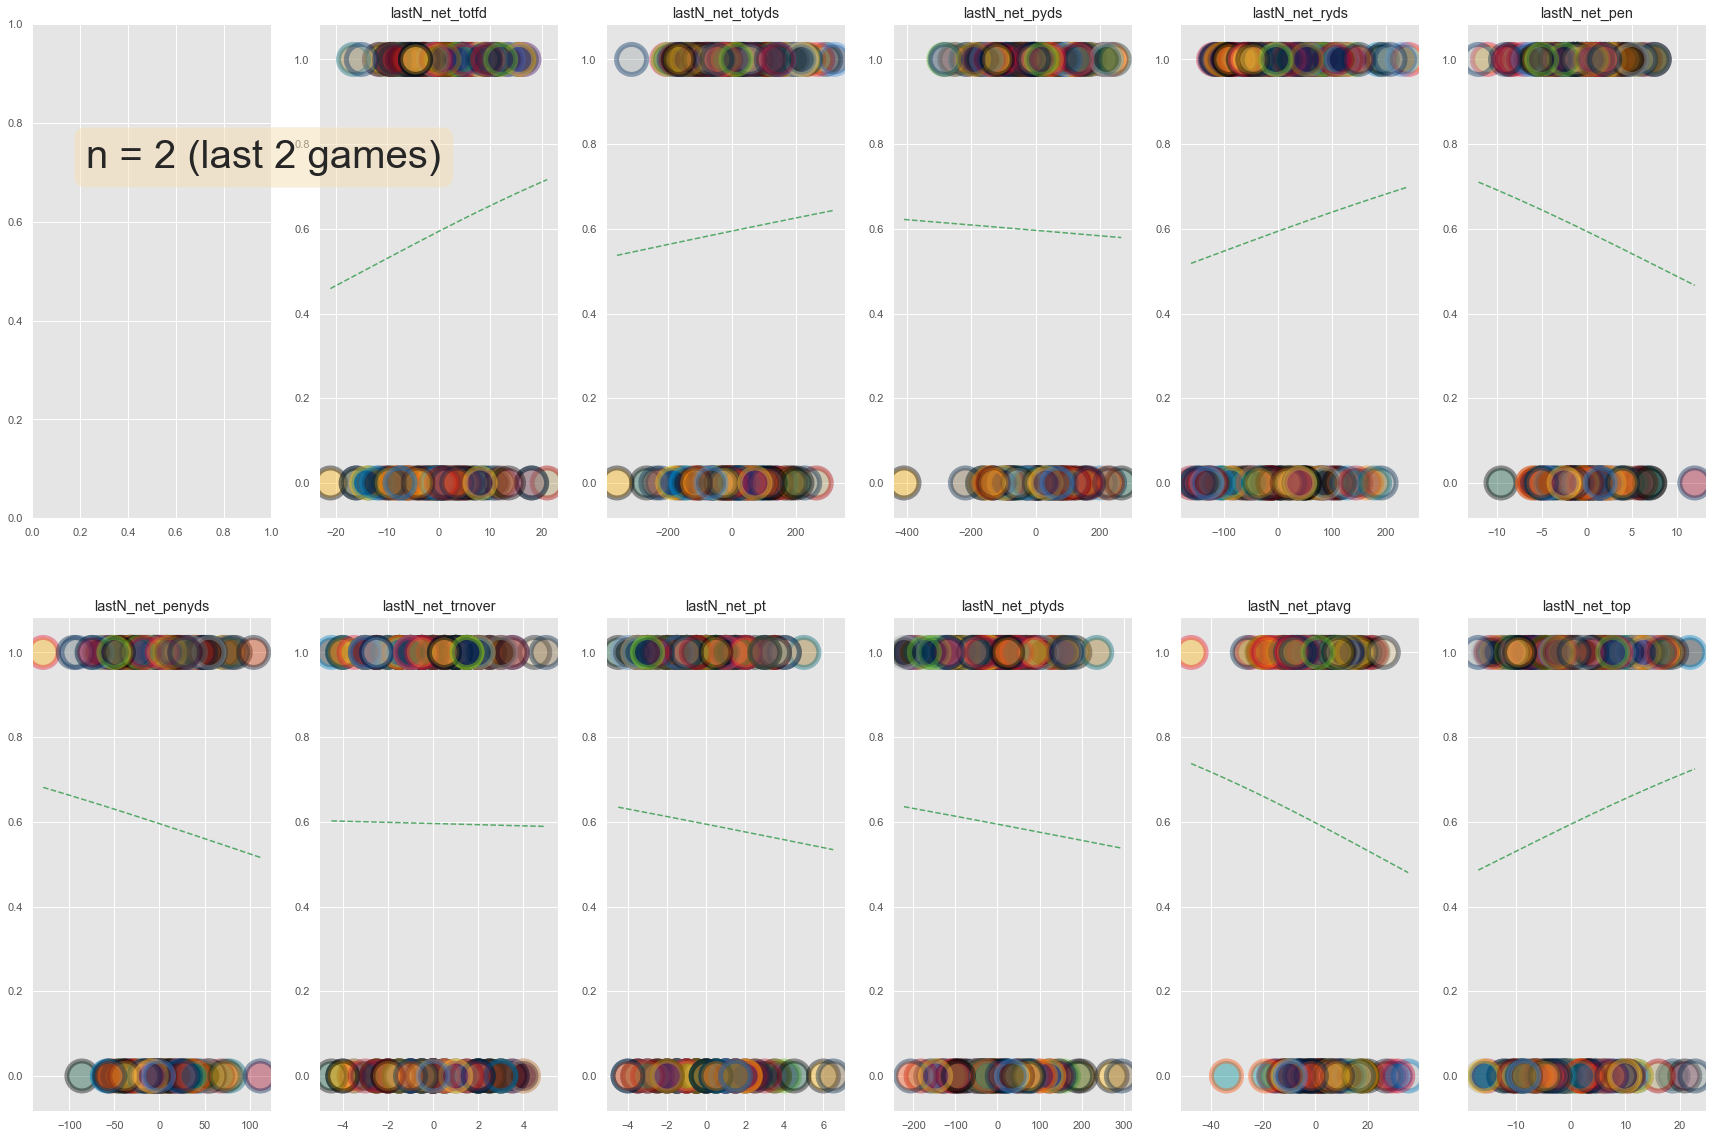

In [30]:
plot_logit_features(data_net_2, 2)

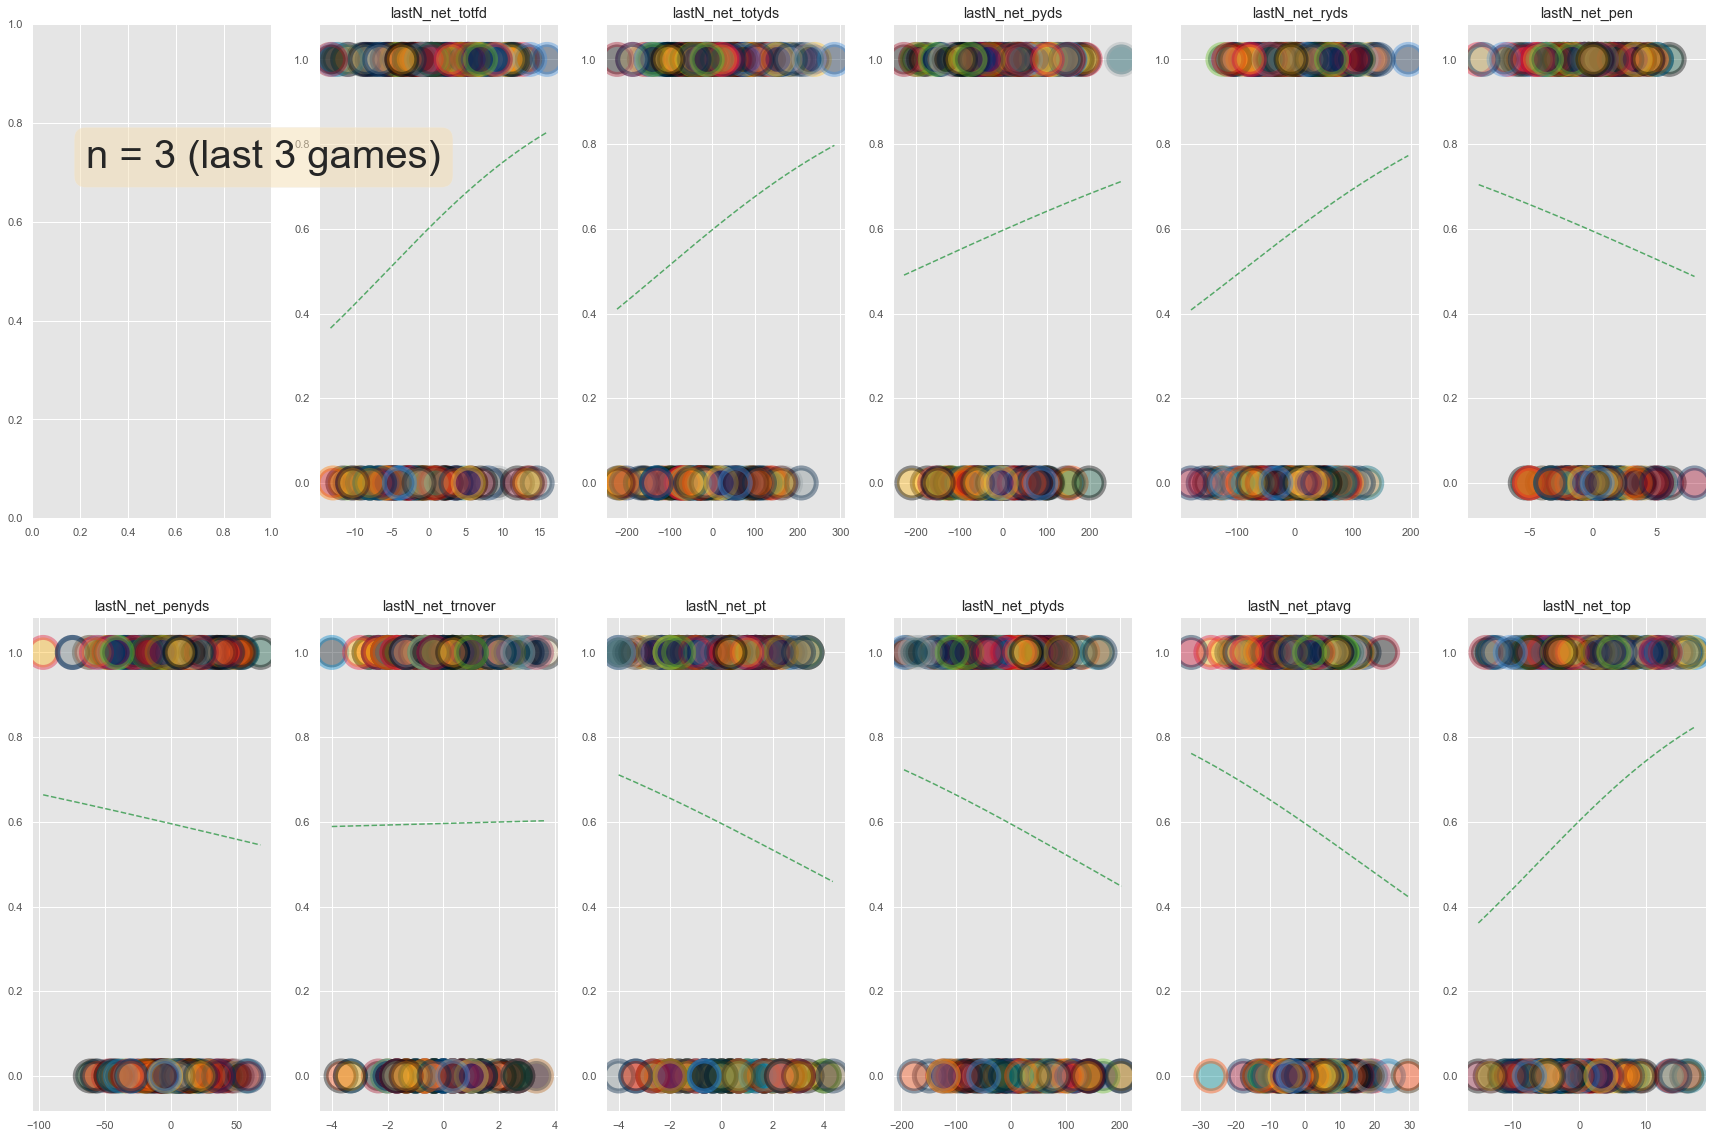

In [31]:
plot_logit_features(data_net_3, 3)

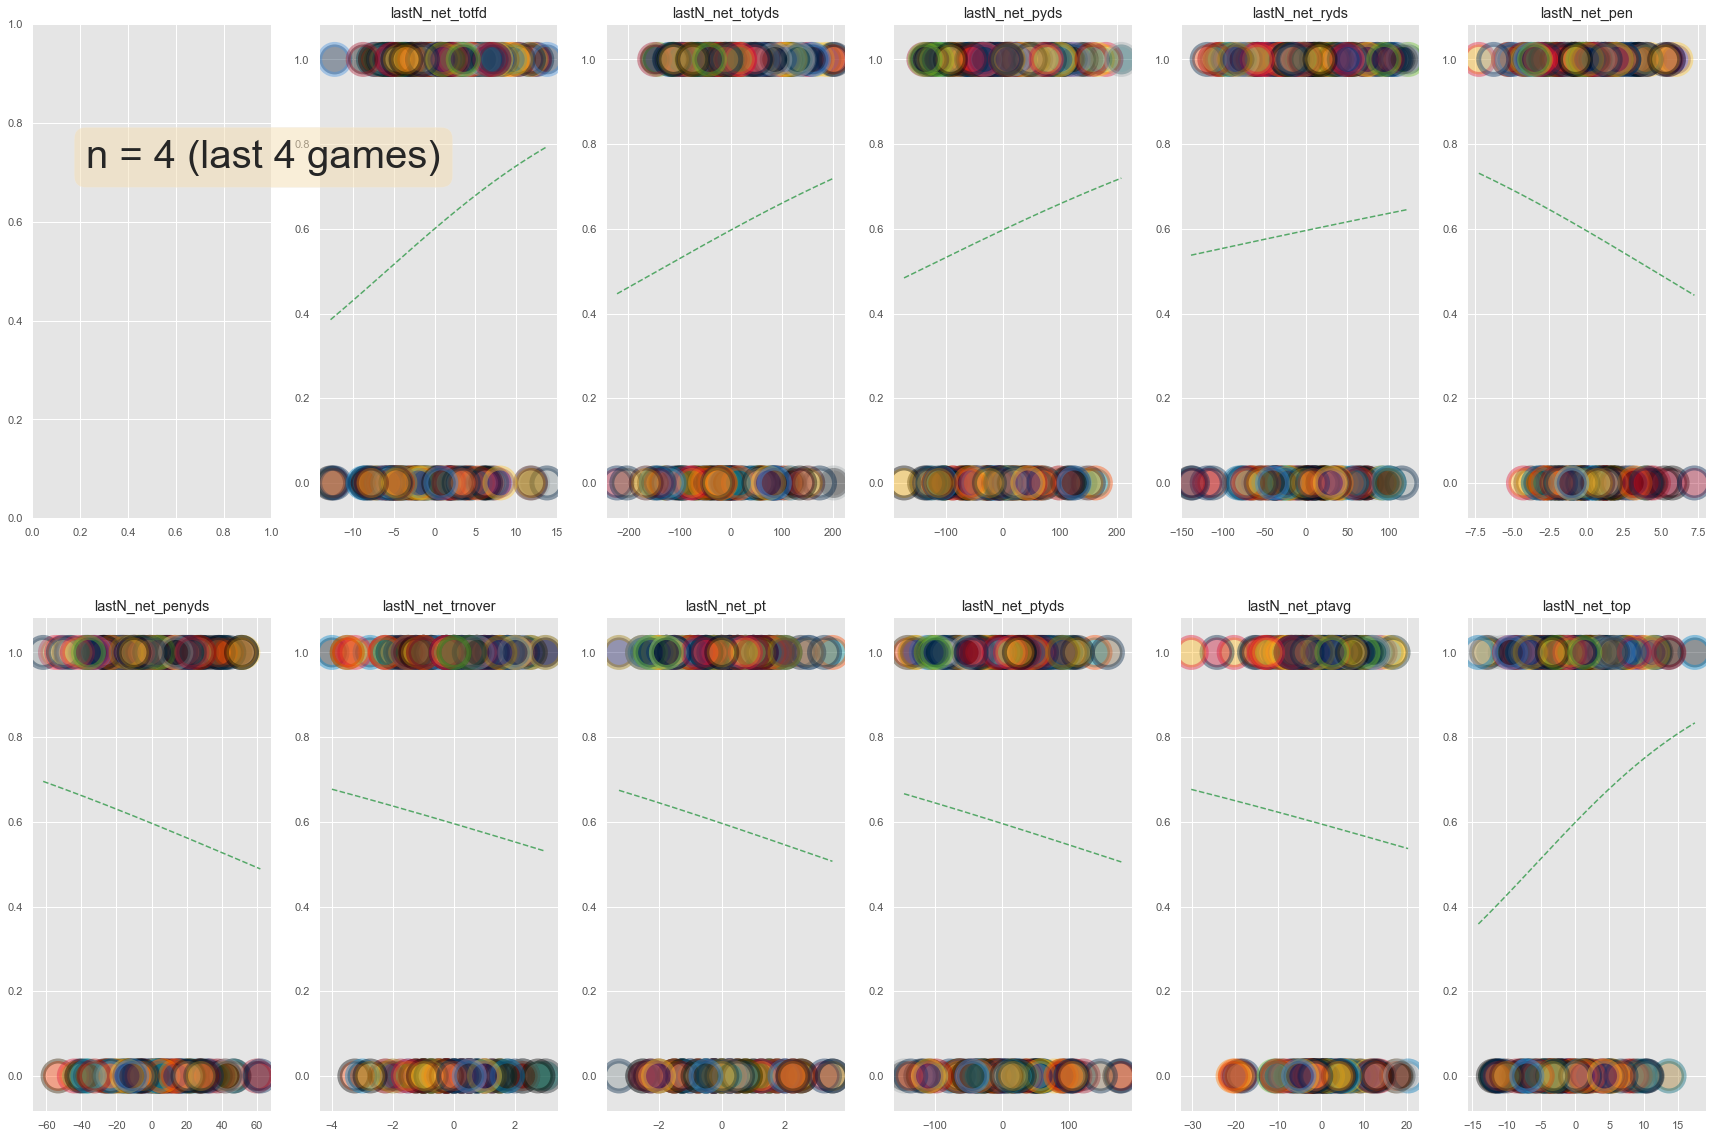

In [32]:
plot_logit_features(data_net_4, 4)
    

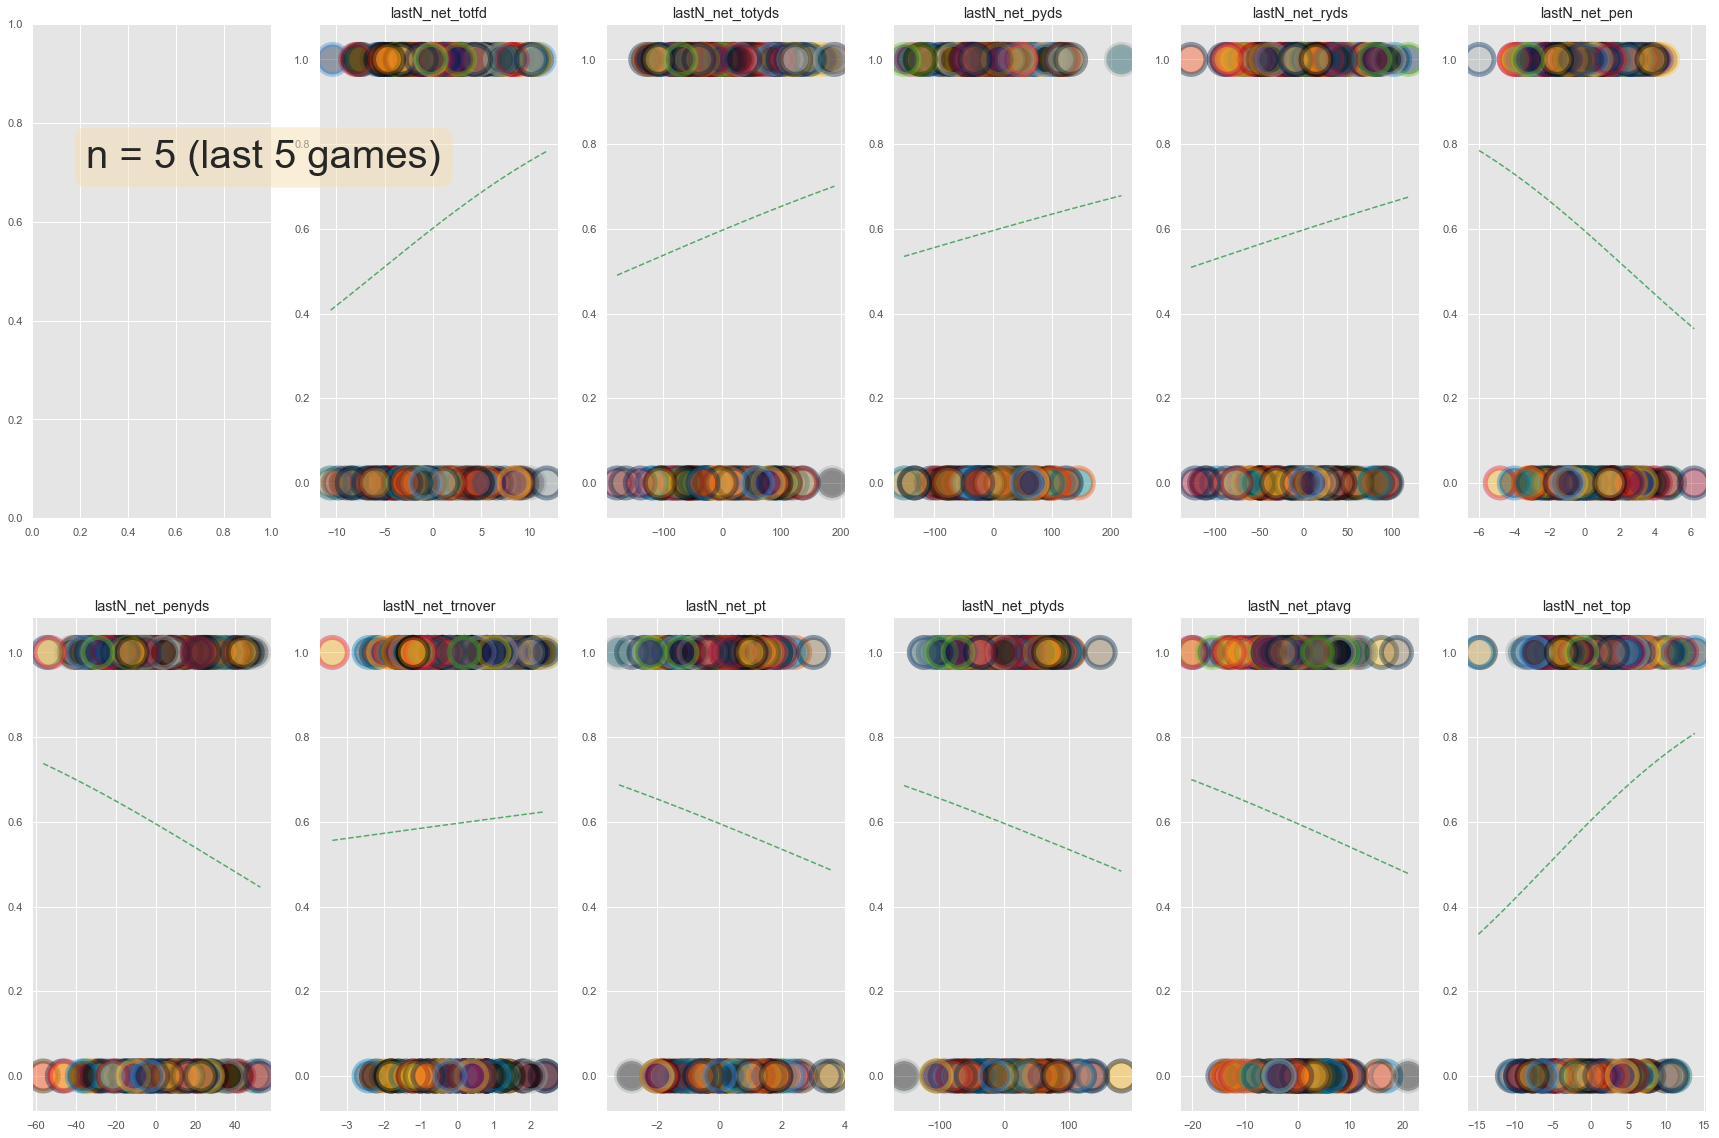

In [33]:
plot_logit_features(data_net_5, 5)
    

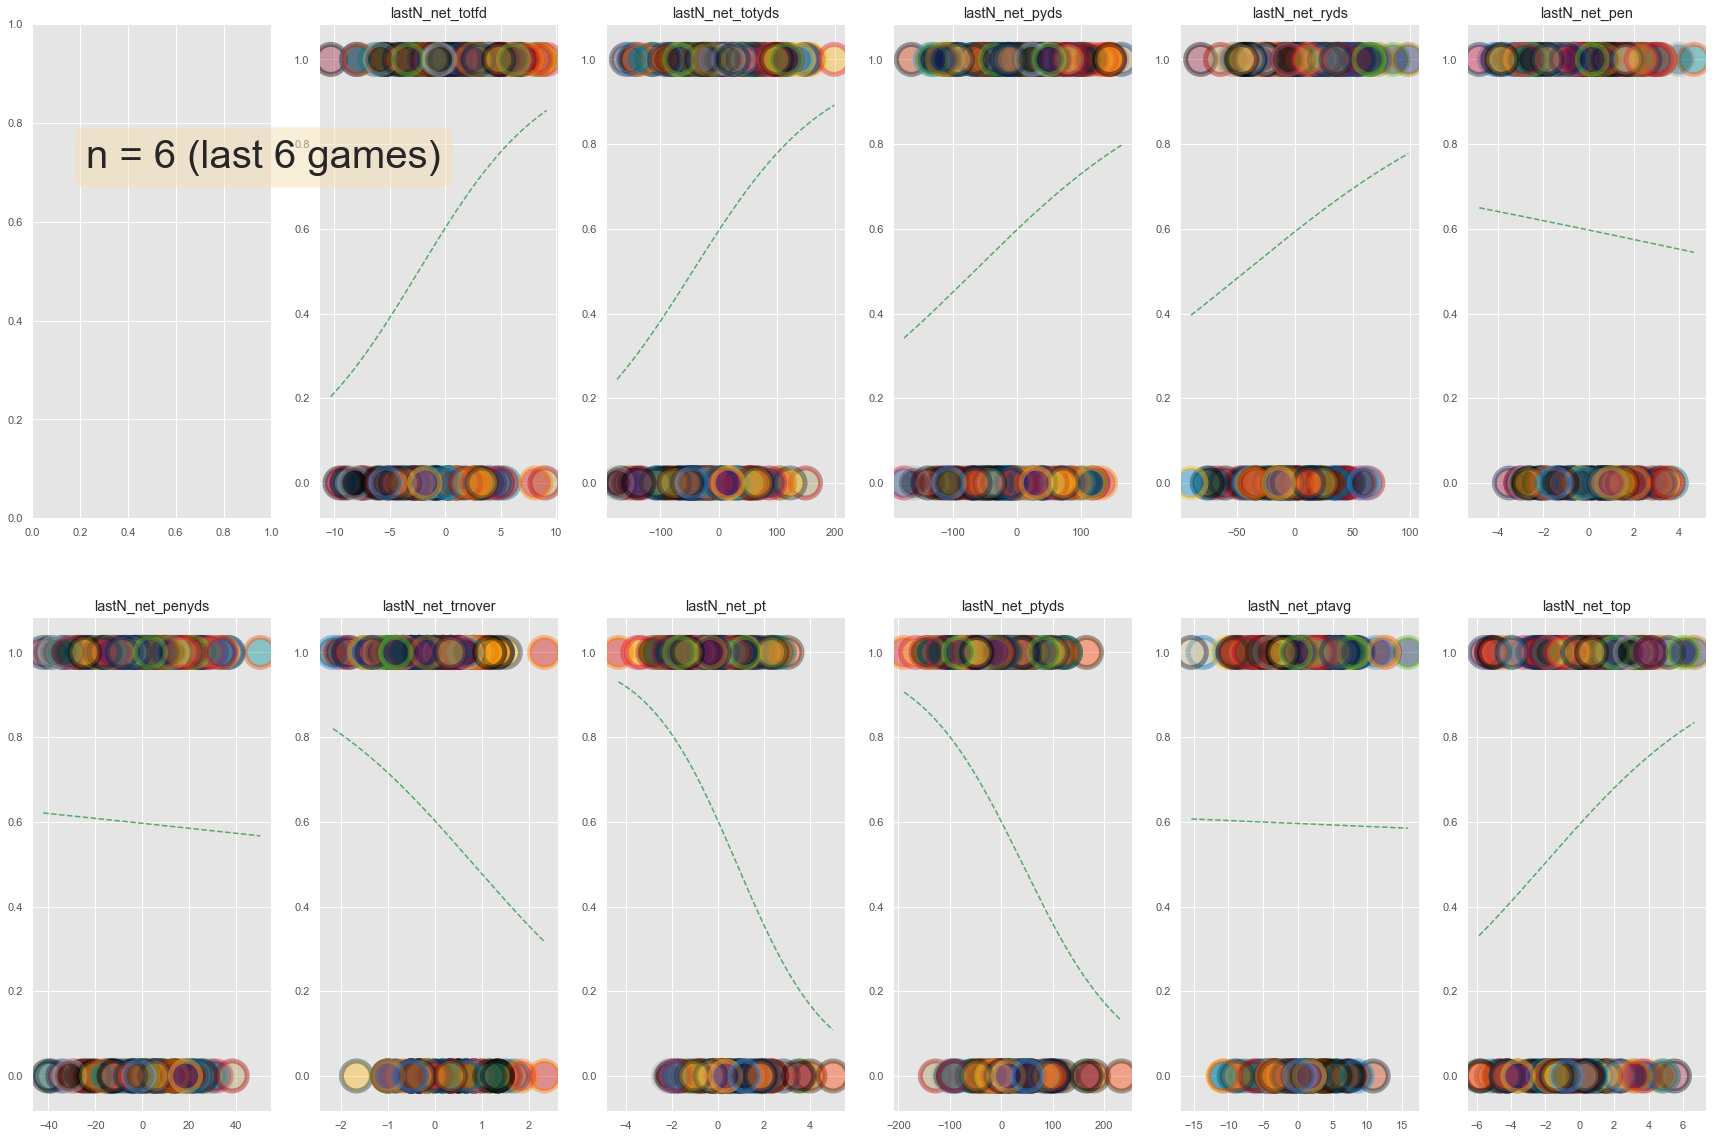

In [50]:
plot_logit_features(data_6, 6)
    

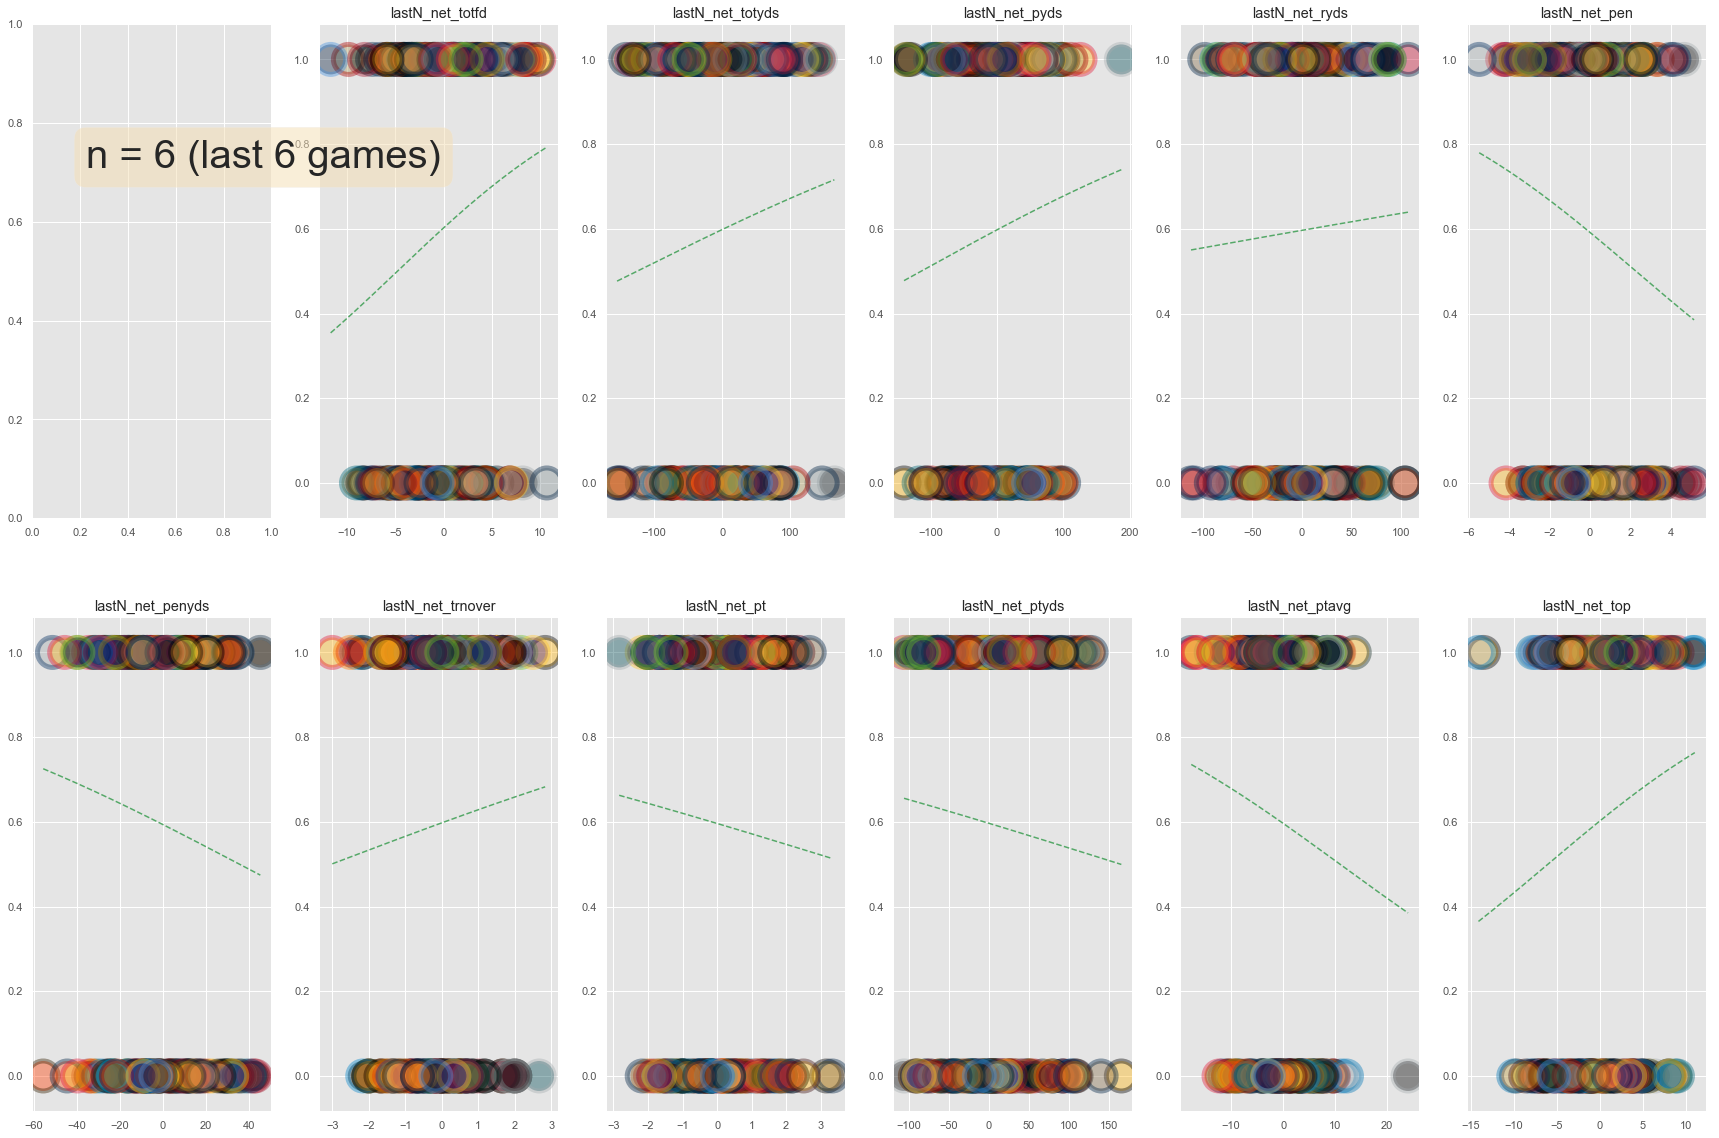

In [51]:
plot_logit_features(data_net_6, 6)

In [38]:
def plot_confusion_matrix(cm, ax, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    p = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title,fontsize=font_size)
    
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)
   
   

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center", size = font_size,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    ax.set_ylabel('True label',fontsize=font_size)
    ax.set_xlabel('Predicted label',fontsize=font_size)

In [40]:
font_size = 20

def confusion_matrix_for_all(df, n):
    fig, axs = plt.subplots(2,6, figsize=(30, 20))
    axs = axs.ravel()
    for i in range(10, len(df.columns)):
        y = df.iloc[:, 9] ## does the home team win?
        x = np.array(df.iloc[:, i]).reshape(-1, 1) ## The features. Were trying to predict if the home team wins using features.
        log_model = LogisticRegression()
        log_model.fit(x,y) ## To make this connection possible, we use a Logistic Model
        
        y_pred = log_model.predict(x)
        y_true = y
        cnf_matrix = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cnf_matrix.ravel()
        accuracy = (tp + tn)/(tp + tn + fp + fn)
        np.set_printoptions(precision=2)
        axs[i-10].grid(False)
        class_names = ["Win","Loss"]
        plot_confusion_matrix(cnf_matrix, axs[i-10], classes=class_names,
        title= df.iloc[:, i].name + ', %' + str(round(accuracy*100)))
        
#     textstr = 'n = ' + str(n) + " (last " + str(n) + " games)"
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     fig.text(0.15, 0.8, textstr, transform=axs[i-9].transAxes, fontsize=40,
#     verticalalignment='top', bbox=props)      
#     textstr = 'n = ' + str(n) + " (last " + str(n) + " games)"
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     fig.text(0.15, 0.8, textstr, transform=axs[i-9].transAxes, fontsize=40,
#     verticalalignment='top', bbox=props)      

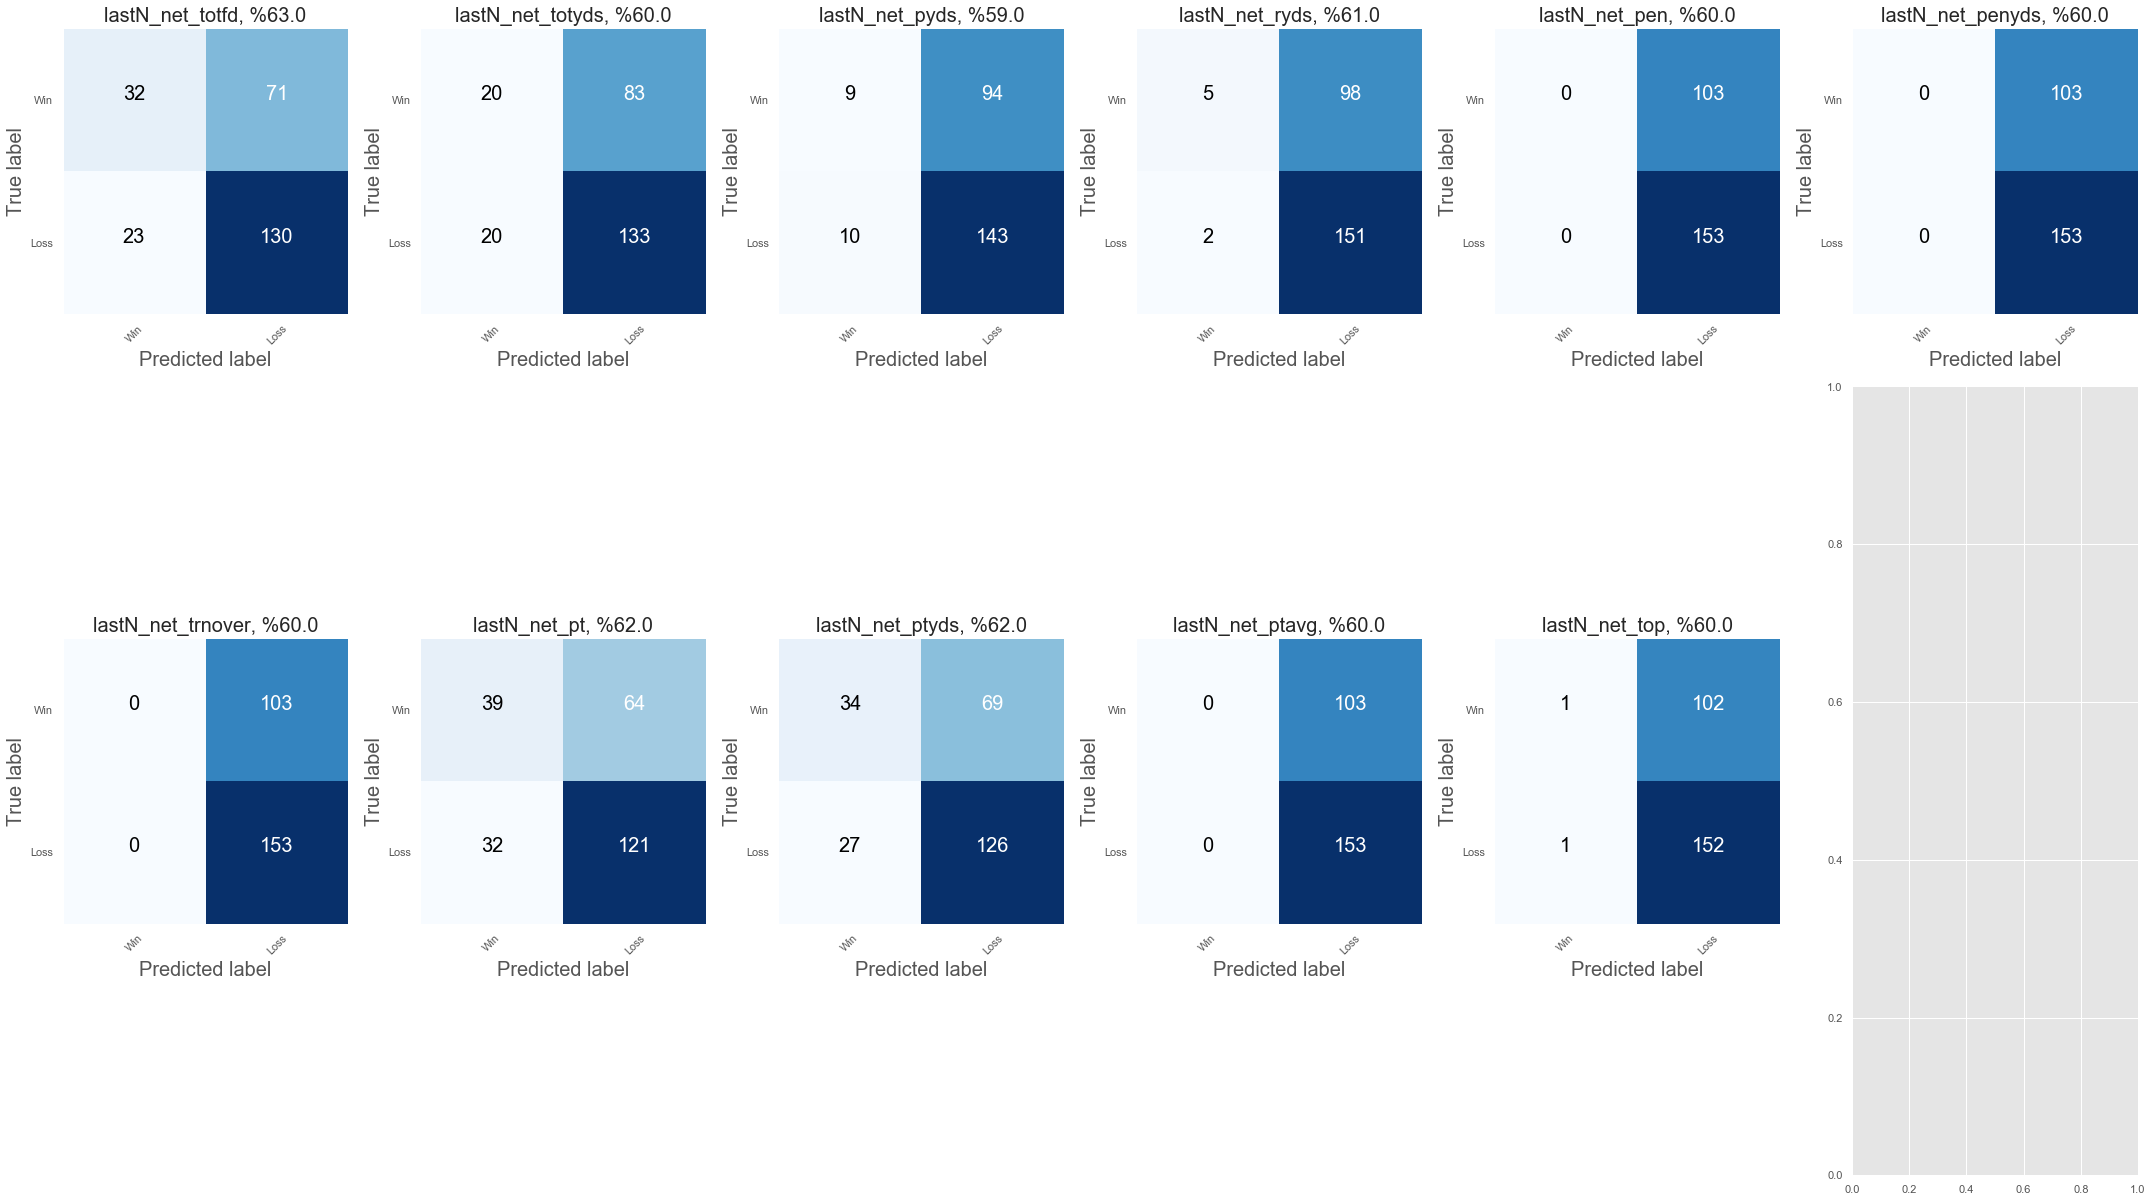

In [132]:
confusion_matrix_for_all(data_2, 2)

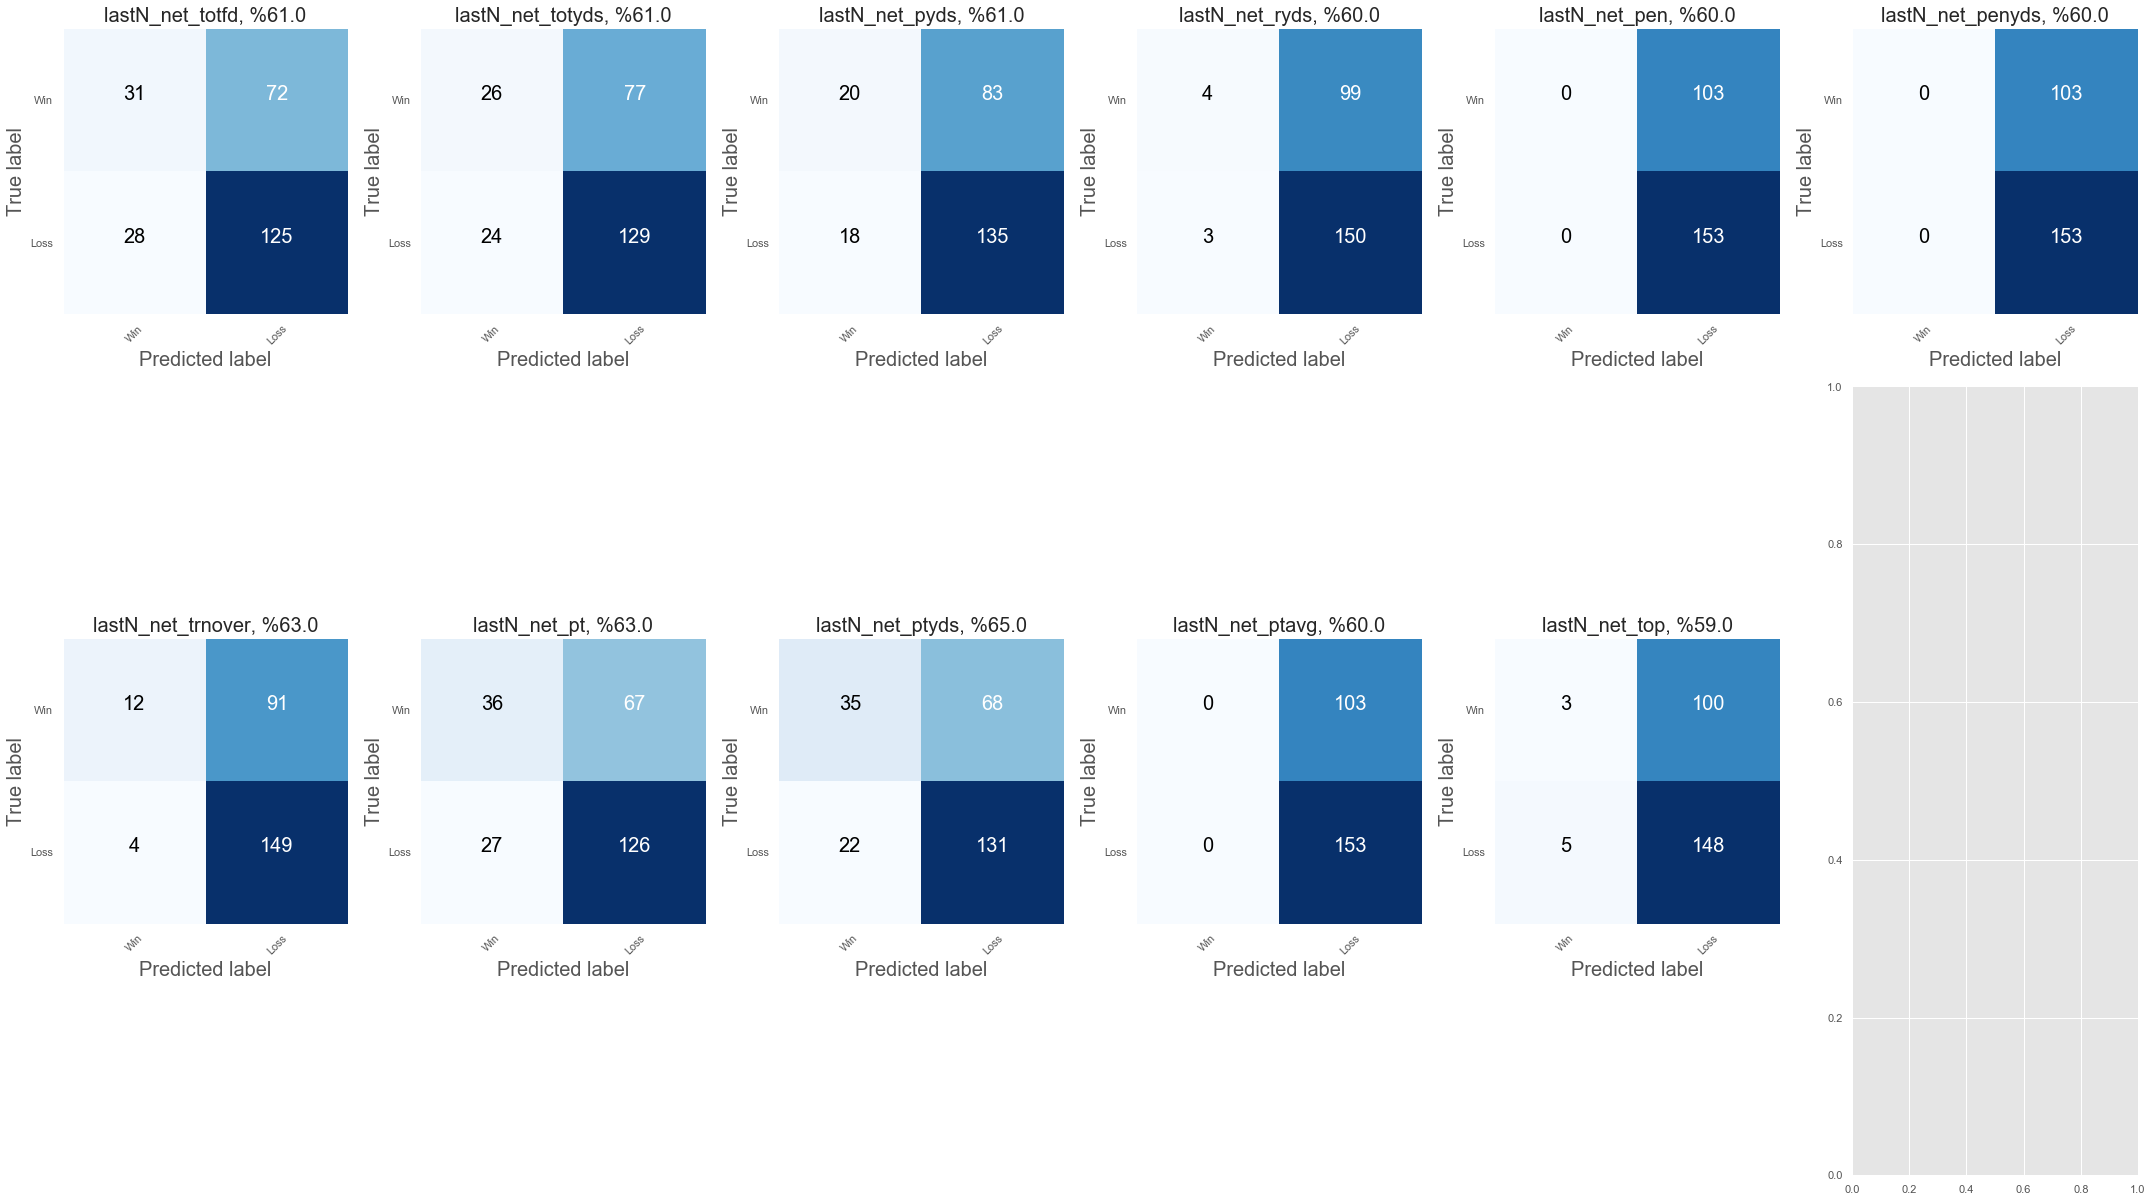

In [174]:
confusion_matrix_for_all(data_3, 3)

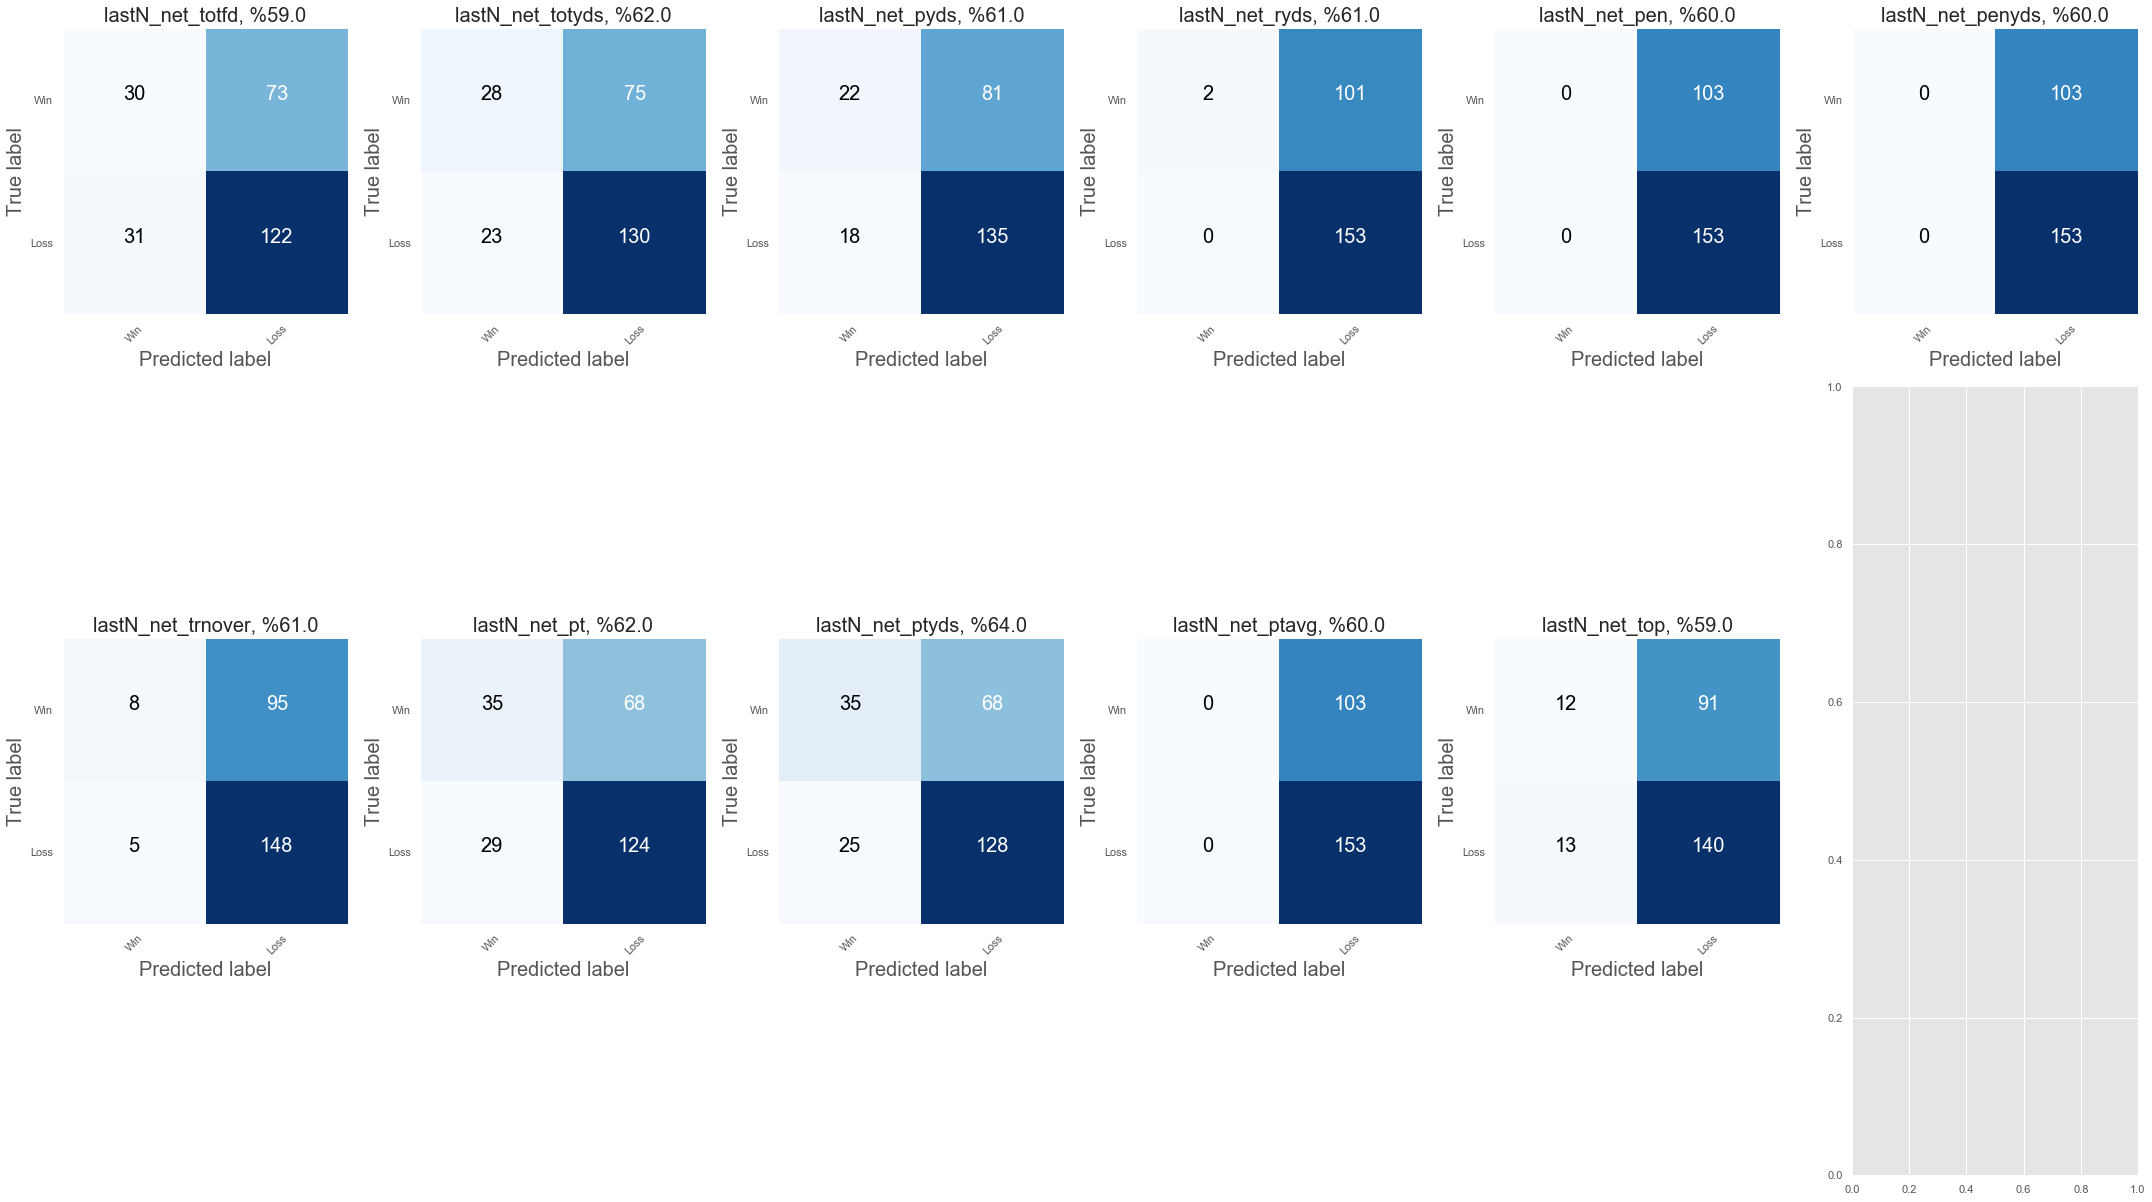

In [175]:
confusion_matrix_for_all(data_4, 4)

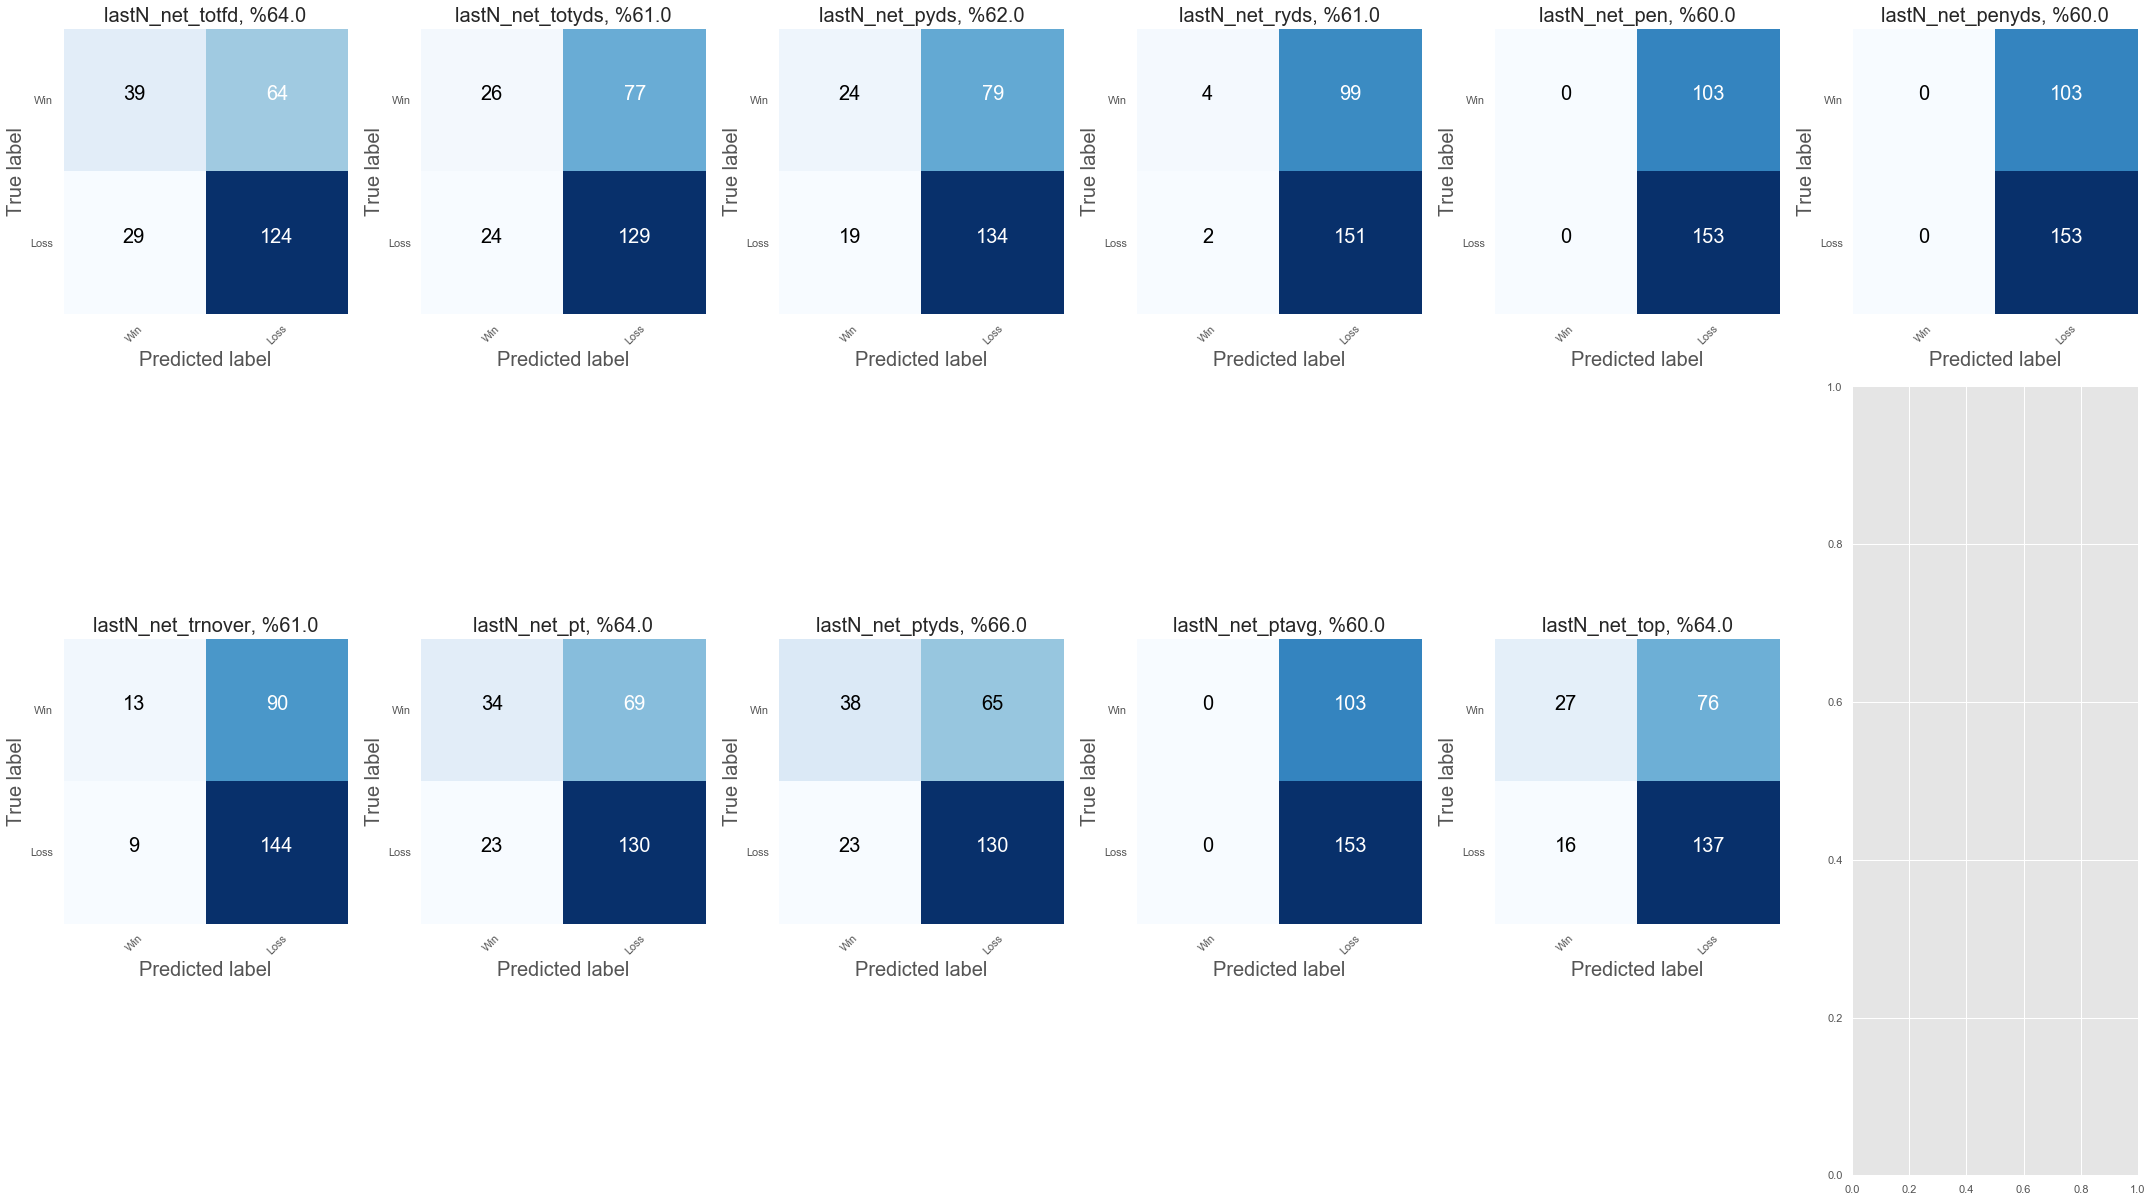

In [176]:
confusion_matrix_for_all(data_5, 5)

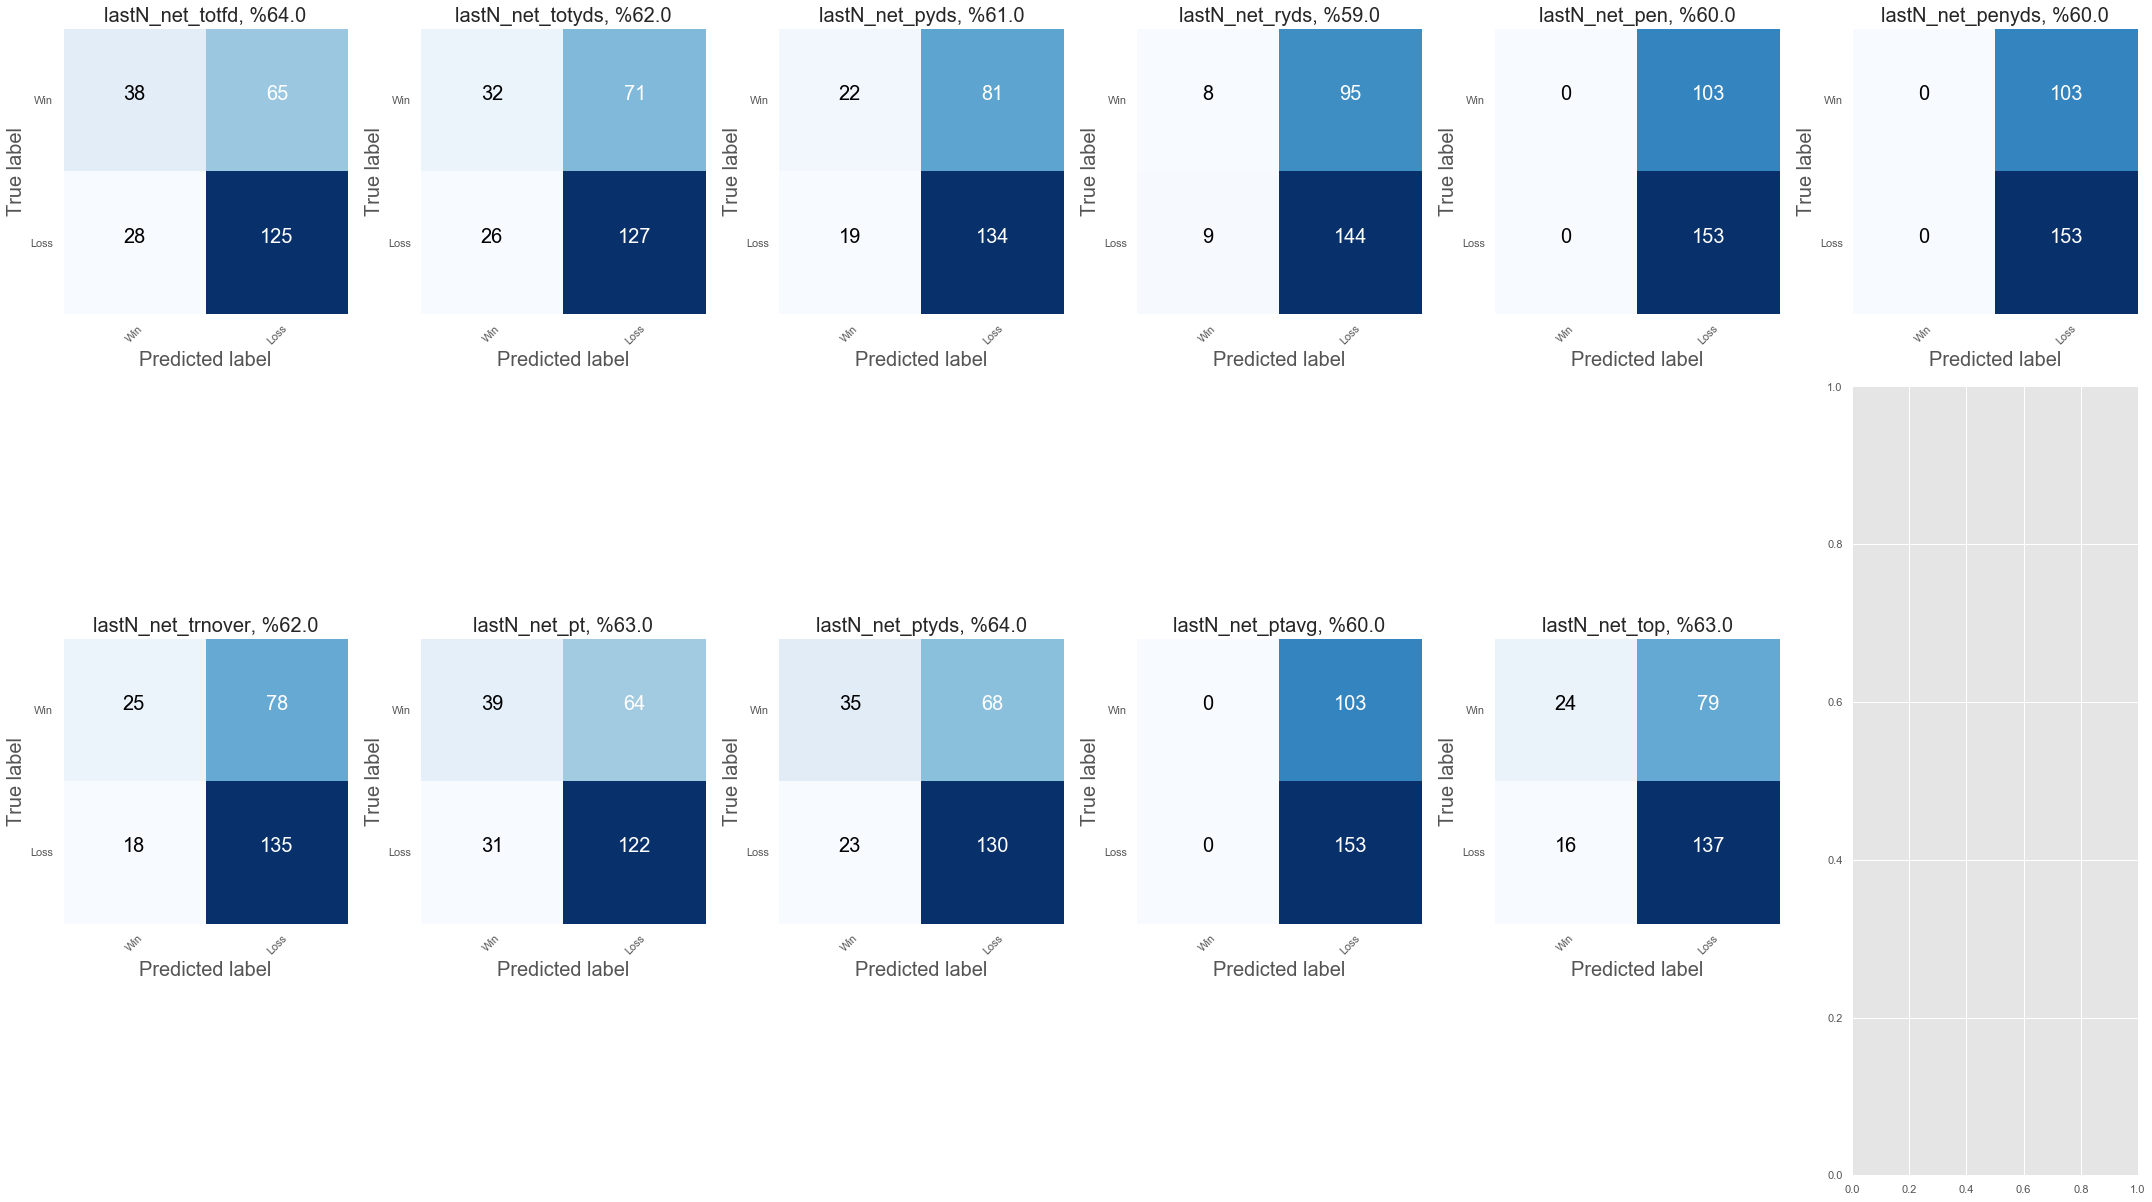

In [177]:
confusion_matrix_for_all(data_6, 6)

In [36]:
def confusion_matrix_one(df, n):
    y = df.iloc[:, 9] ## does the home team win?
    x = np.array(df.iloc[:, 10:]) ## The features. Were trying to predict if the home team wins using features.
    log_model = LogisticRegression()
    log_model.fit(x,y) ## To make this connection possible, we use a Logistic Model

    y_pred = log_model.predict(x)
    y_true = y
    cnf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cnf_matrix.ravel()
    accuracy = (tp + tn)/(tp + tn + fp + fn)
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.grid(False)
    class_names = ["Win","Loss"]
    plot_confusion_matrix(cnf_matrix, ax, classes=class_names,
                          title= 'All variables' + ', %' + str(round(accuracy*100)))

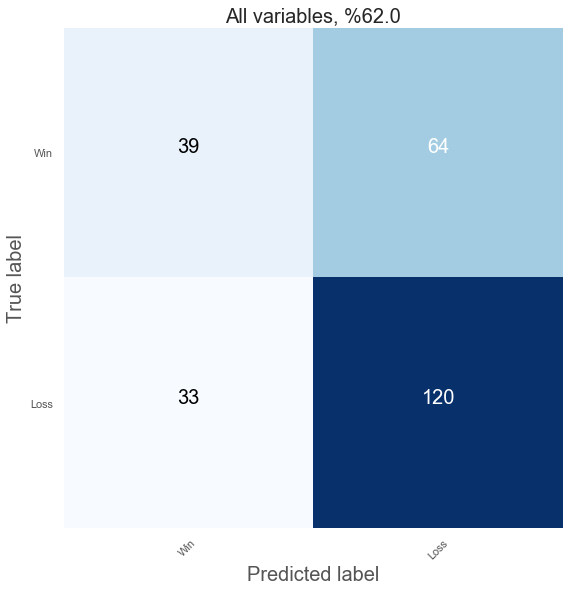

In [144]:
confusion_matrix_one(data_2, 2)

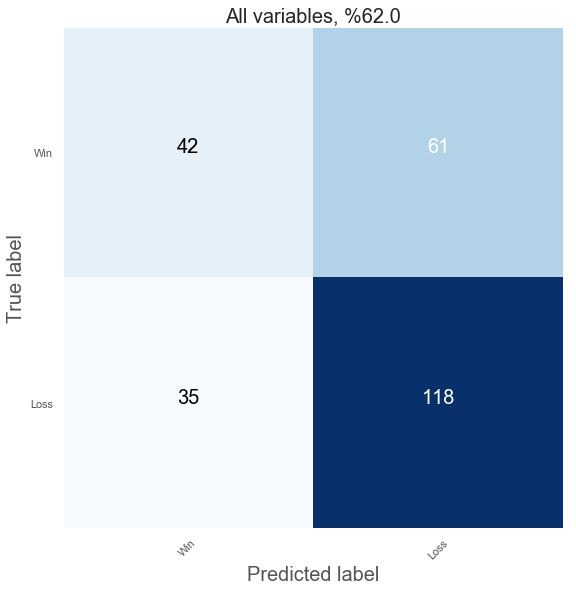

In [145]:
confusion_matrix_one(data_3, 3)

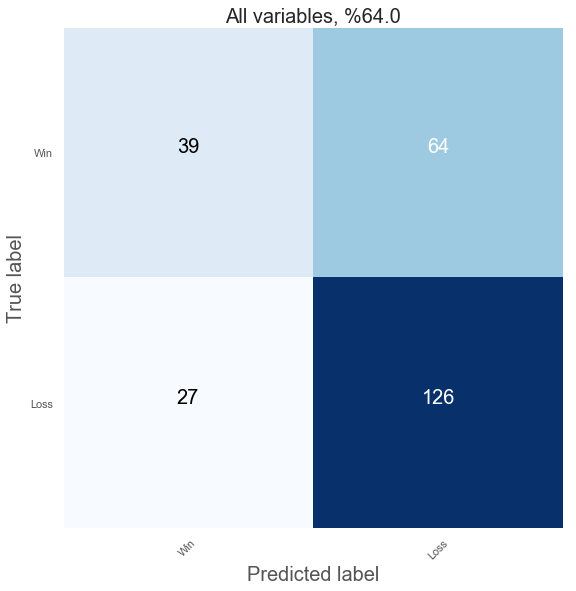

In [146]:
confusion_matrix_one(data_4, 4)

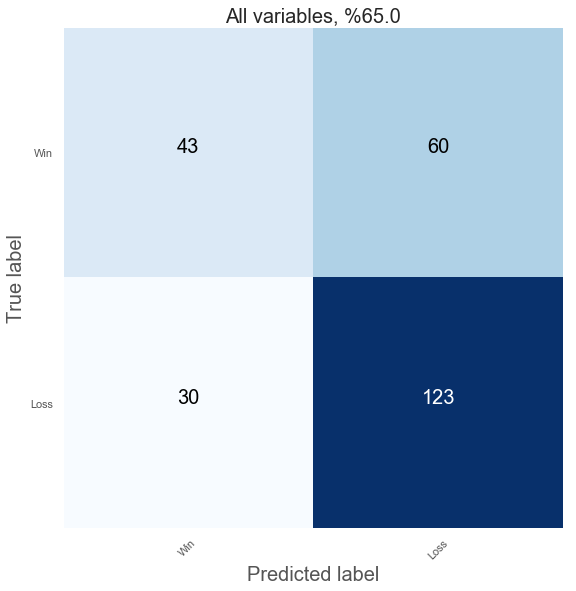

In [147]:
confusion_matrix_one(data_5, 5)

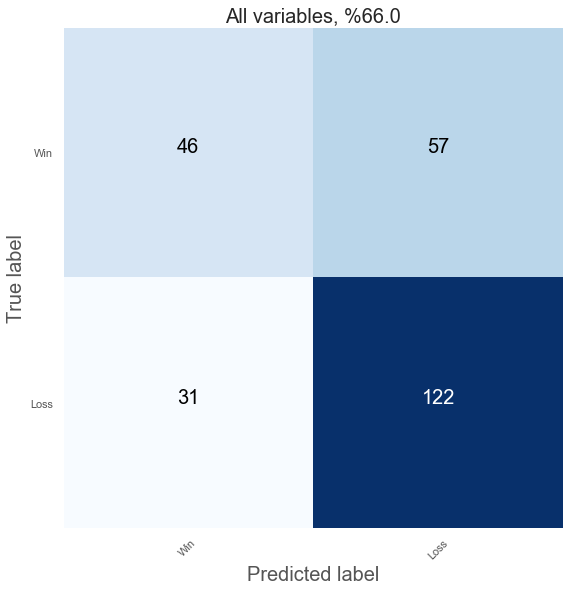

In [149]:
confusion_matrix_one(data_6, 6)

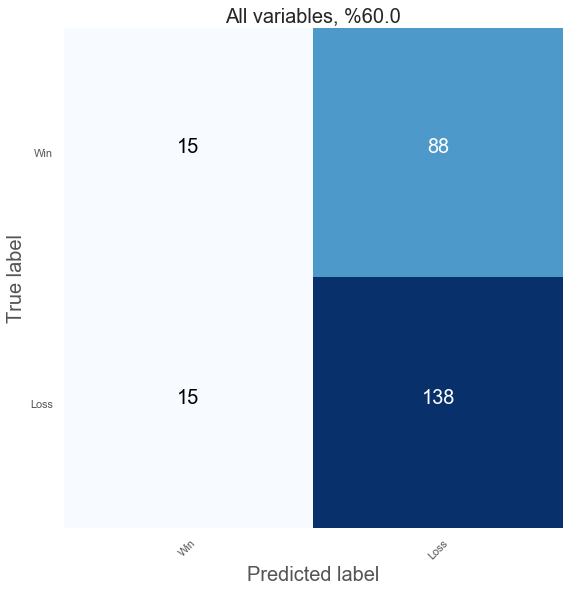

In [41]:
confusion_matrix_one(data_net_2, 2)

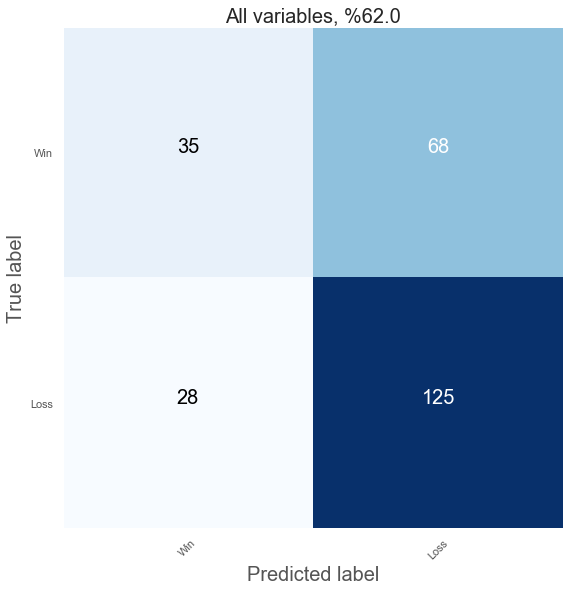

In [42]:
confusion_matrix_one(data_net_3, 3)

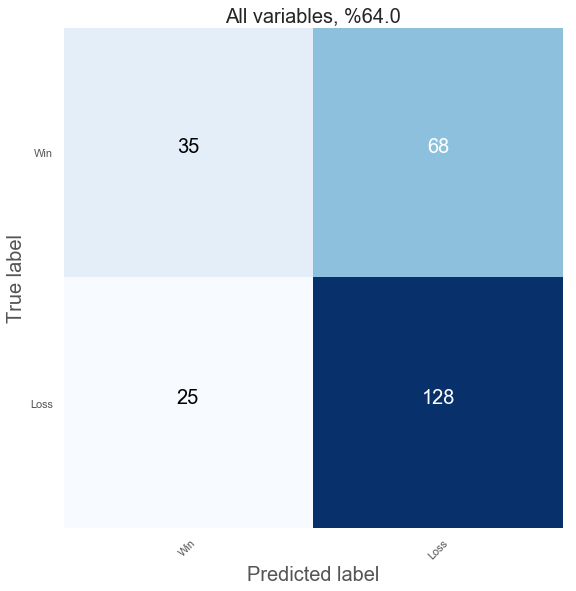

In [43]:
confusion_matrix_one(data_net_4, 4)

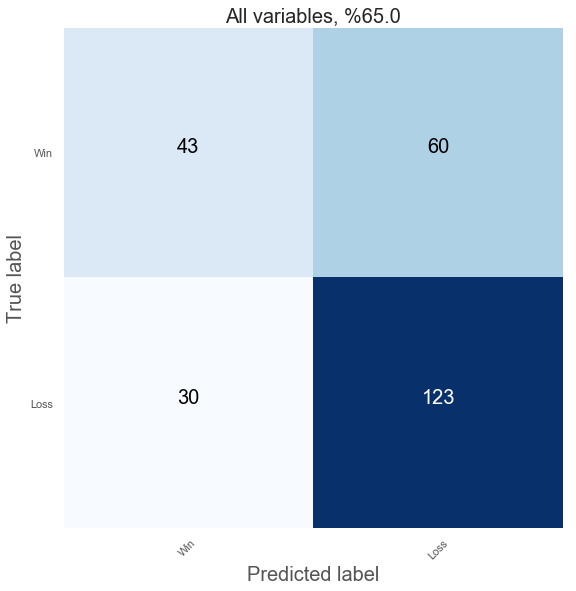

In [44]:
confusion_matrix_one(data_net_5, 5)

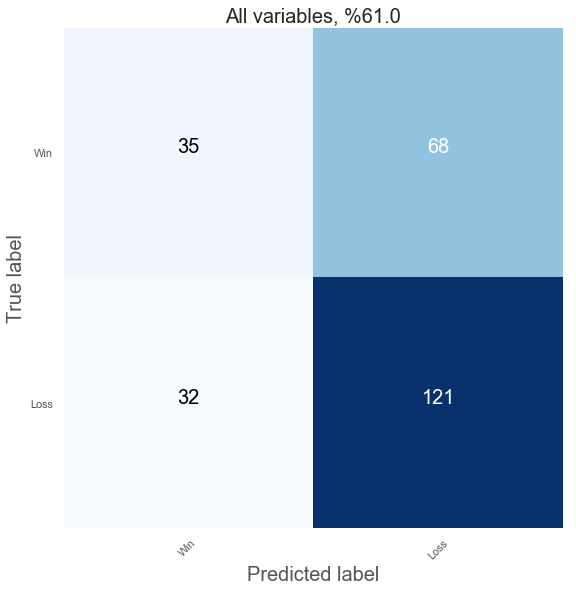

In [45]:
confusion_matrix_one(data_net_6, 6)

In [150]:
### ROC CURVES ######)(&#########

In [151]:
def roc_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list
    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''
    
    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)

    return tprs, fprs, thresholds.tolist()

In [168]:
def plot_roc_curve(df, n):
    y = df.iloc[:, 9] ## does the home team win?
    x = np.array(df.iloc[:, 10:]) ## The features. Were trying to predict if the home team wins using features.
    log_model = LogisticRegression()
    log_model.fit(x,y) ## To make this connection possible, we use a Logistic Model

    y_probas = log_model.predict_proba(x)[:, 1]
    y_true = y
    fpr, tpr,thresholds = roc_curve(y_probas, y_true)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(fpr, tpr)
    ax.set_xlabel("False Positive Rate (1 - Specificity)")
    ax.set_ylabel("True Positive Rate (Sensitivity, Recall)")
    ax.set_title("ROC plot of all variable model")
    
    

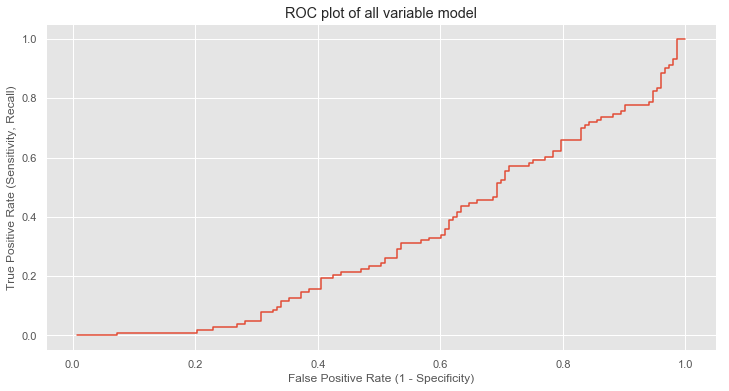

In [169]:
plot_roc_curve(data_2, 2)

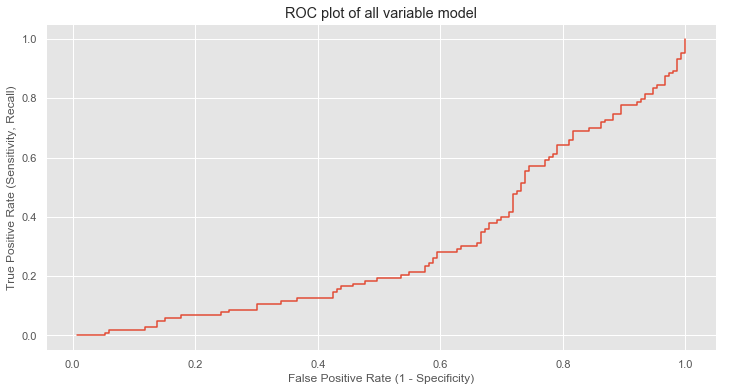

In [170]:
plot_roc_curve(data_3, 3)


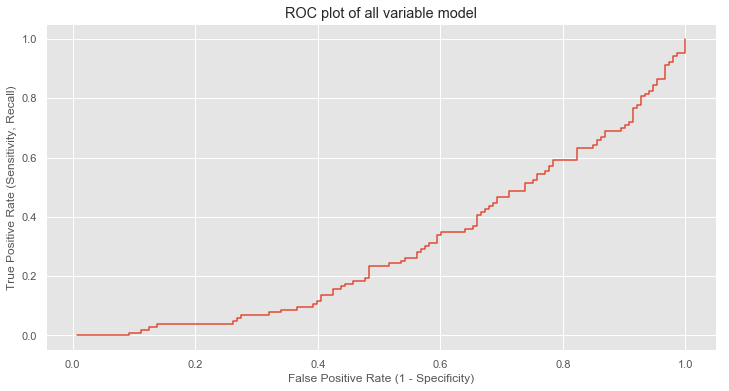

In [171]:
plot_roc_curve(data_4, 4)


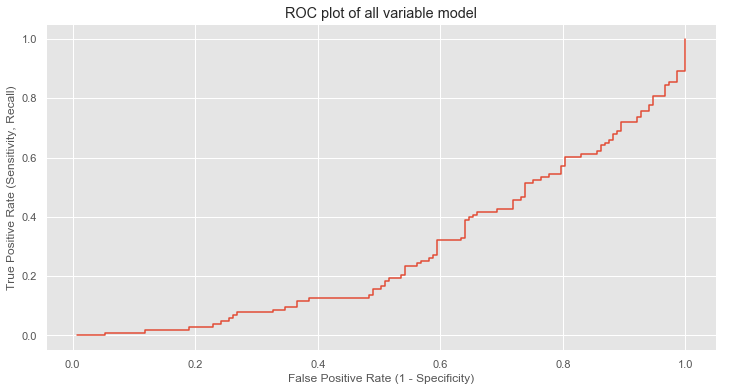

In [172]:
plot_roc_curve(data_5, 5)


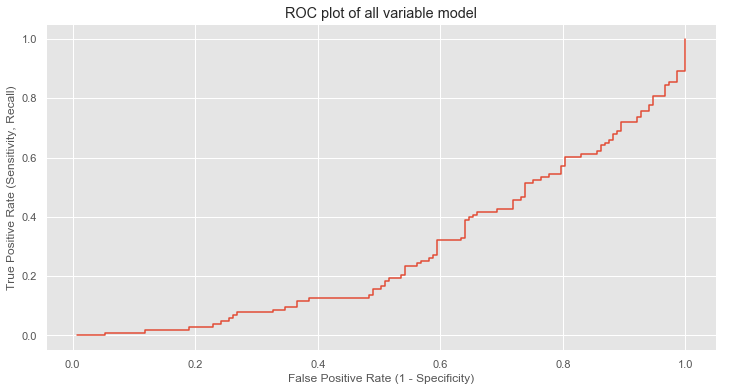

In [173]:
plot_roc_curve(data_5, 5)
